In [1]:
import os

from syntax_sugar import END, pipe
from syntax_sugar import process_syntax as p
from syntax_sugar import thread_syntax as t
NTHR = 16
import os
from os.path import join

In [2]:
import h5py

In [3]:
from scipy.integrate import quad

import TMQGP as tm
from numpy import *

import QuarkTM
from QuarkTM import Channel, ChannelGroup, ChannelL, Particle

import matplotlib
matplotlib.style.use('publication23')

mQ = 0.6

qrange = linspace(0, 5, 101)
erange = linspace(-5, 5, 401)
eps = 10e-2
# pt = QuarkTM.Particle(mQ, qrange, erange, eps=5e-2)

G = 6
L = 0.5
screen = 0.04
G1 = 3

# ch = QuarkTM.Channel(pt, pt, T, G=8, screen=0, ds=4, da=1, Fa=1)

import tqdm

from scipy.optimize import minimize

params = {'G' : G, 'L' : L, 'screen' : screen}
params_rep = {'G' : -G, 'L' : L, 'screen' : screen}
params1 = {'G' : G1, 'L' : L, 'screen' : screen}
params_rep1 = {'G' : -G1, 'L' : L, 'screen' : screen}


pss = [params, params1]
pss_rep = [params_rep, params_rep1]
mu = 0
lmax = 1

In [4]:
T = 0.25

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
def f(x, T):
    return 1/(exp(x/T) + 1)

Start of iterations

In [7]:
subtr = 1

In [8]:
folder = '8ch_trange_strong'
if subtr:
    folder += '_subtr'

if not os.path.exists(folder):
    os.mkdir(folder)

In [9]:
quark_run = Particle(mQ, qrange, erange, eps=eps, mu=mu)
aquark_run = Particle(mQ, qrange, erange, eps=eps, mu=mu)

In [10]:
imss = array([array([-eps for q in qrange])]*2).transpose()
ress = array([array([0. for q in qrange])]*2).transpose()

In [11]:
eArr = array([erange for q in qrange]).transpose()

In [12]:
omKs = array([sqrt(mQ**2 + qrange**2)]*2).transpose()

In [13]:
mu = 0*T

In [14]:
DELTA = 1

In [15]:
Trange = linspace(0.15, 0.55, 21)

In [16]:
Trange[:10:2]

array([0.15, 0.19, 0.23, 0.27, 0.31])

In [17]:
Trange

array([0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35,
       0.37, 0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55])

In [18]:
# Trange = array([0.4])

In [19]:
omArrs = [array([omk for e in erange]) for omk in omKs.transpose()]
ImS_K_Arrs = [array([ims for e in erange]) for ims in imss.transpose()]
ReS_K_Arrs = [array([res for e in erange]) for res in ress.transpose()]

In [20]:
G2_QA = (1) / (eArr - omArrs[0] - omArrs[1] - 1j*(ImS_K_Arrs[0] + ImS_K_Arrs[1]))

In [21]:
ch = QuarkTM.ChannelL('qa1', lmax, quark_run, aquark_run, 0.01, pss, ds=4, da=1, Fa=1, mu=mu, G2=G2_QA)

In [22]:
ch.populate_T()

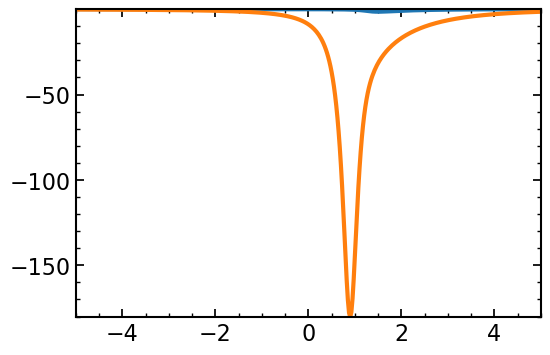

In [23]:
plt.plot(erange, imag(ch.chs[1].TM[:, 10]))
plt.plot(erange, imag(ch.chs[0].TM[:, 10]))

In [61]:
for T in Trange:
    DELTA = 1
    print('Processing T = ', T)
    iter = 0
    omKs_iter = []
    ress_iter = []
    imss_iter = []
    G2ss_iter = []
    chs_iter = []
    TMss_iter = []
    
    while DELTA > 1e-3:
        
        # if len(ims) == 0 or len(res) == 0:
        channels_QQ = QuarkTM.ChannelGroup(mu0=False)
        channels_QA = QuarkTM.ChannelGroup(mu0=False)
        channels_AA = QuarkTM.ChannelGroup(mu0=False)
        channels_AQ = QuarkTM.ChannelGroup(mu0=False)
        
        # ImS_K_Arr = array([ims for e in er|ange])
        # ReS_K_Arr = array([res for e in erange])
        
        ImS_K_Arrs = [array([ims for e in erange]) for ims in imss.transpose()]
        ReS_K_Arrs = [array([res for e in erange]) for res in ress.transpose()]
        
        
        omArrs = [array([omk for e in erange]) for omk in omKs.transpose()]
        
        G2_QQ = (1 - 2*f(omArrs[0], T)) / (eArr - 2*omArrs[0] - 1j*2*ImS_K_Arrs[0] + 2*mu)
        G2_QA = (1 - f(omArrs[0], T) - f(omArrs[1], T)) / (eArr - omArrs[0] - omArrs[1] - 1j*(ImS_K_Arrs[0] + ImS_K_Arrs[1]))
        G2_AA = (1 - 2*f(omArrs[1], T)) / (eArr - 2*omArrs[1] - 1j*2*ImS_K_Arrs[1] - 2*mu)
        
        
        channels_QQ.addChannel(
            QuarkTM.ChannelL('qq3', lmax, quark_run, quark_run, T, pss, ds=4, da=3, Fa=1/2, mu=mu, G2=G2_QQ)
        )
    
        channels_QQ.addChannel(
            QuarkTM.ChannelL('qq6', lmax, quark_run, quark_run, T, pss_rep, ds=4, da=6, Fa=1/4, mu=mu, G2=G2_QQ)
        )
    
        channels_QA.addChannel(
            QuarkTM.ChannelL('qa8', lmax, quark_run, aquark_run, T, pss_rep, ds=4, da=8, Fa=1/8, mu=mu, G2=G2_QA)
        )
        
        channels_QA.addChannel(
            QuarkTM.ChannelL('qa1', lmax, quark_run, aquark_run, T, pss, ds=4, da=1, Fa=1, mu=mu, G2=G2_QA)
        )
        
        channels_AA.addChannel(
            QuarkTM.ChannelL('aa3', lmax, aquark_run, aquark_run, T, pss, ds=4, da=3, Fa=1/2, mu=mu, G2=G2_AA)
        )
        
        channels_AQ.addChannel(
            QuarkTM.ChannelL('aq1', lmax, aquark_run, quark_run, T, pss, ds=4, da=1, Fa=1, mu=mu, G2=G2_QA)
        )
    
        channels_AA.addChannel(
            QuarkTM.ChannelL('aa6', lmax, aquark_run, aquark_run, T, pss_rep, ds=4, da=6, Fa=1/4, mu=mu, G2=G2_AA)
        )
    
        channels_AQ.addChannel(
            QuarkTM.ChannelL('aq8', lmax, aquark_run, quark_run, T, pss_rep, ds=4, da=8, Fa=1/8, mu=mu, G2=G2_QA)
        )
    
        chs_Q = [channels_QQ, channels_QA]
        chs_A = [channels_AQ, channels_AA]
        
        Gs_Q = [G2_QQ, G2_QA]
        Gs_A = [G2_QA, G2_AA]
    
        omKs_old = omKs.copy()

        
        
        ################# Build the T-matrix array #########################

        TMss = []
        for i, chs, Gs, lbl in zip(range(2), [chs_Q, chs_A], [Gs_Q, Gs_A], ['Q', 'A']):
            TMs = []
            for j, ch in enumerate(chs):
                TM = ch.get_T()
                TM[erange < 0] = real(TM[erange < 0])
                if subtr:
                    TM -= (TM[0, :] + TM[1, :])/2
                TMs += [TM]
            TMss += [TMs]
        
        omKs = []
        ress = []
        imss = []

        TMss_iter += [TMss]
        for q in tqdm.notebook.tqdm(qrange):
            oms = []
            res = []
            ims = []
            for i, chs, Gs, lbl, TMs in zip(range(2), [chs_Q, chs_A], [Gs_Q, Gs_A], ['Q', 'A'], TMss):
                re = 0
                im = 0
                for j, ch, TM in zip(range(2), chs, TMs):
                    iReTM = tm.Interpolator2D(qrange, erange, ascontiguousarray(real(TM)))
                    iImTM = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(TM)))
                    iEps_i = tm.Interpolator(qrange, ascontiguousarray(omArrs[i][0, :]), 'cubic')
                    iEps_j = tm.Interpolator(qrange, ascontiguousarray(omArrs[j][0, :]), 'cubic')
                    _re = tm.SigmaQP(iEps_i(q), q, T, iReTM, quark_run.R, iEps_i, iEps_j, 0, 0)
                    _im = tm.SigmaQP(iEps_i(q), q, T, iImTM, quark_run.R, iEps_i, iEps_j, 0, 0)
                    re += _re
                    im += _im
                # x0 = x
                om = sqrt(mQ**2 + q**2) + re
                # delta = abs(x - x0)
                # print('k = ', k, 'delta = ', delta)
                # print(om, re, im)
                oms += [om]
                ims += [im]
                res += [re]
            # print(oms)
            omKs += [oms]
            imss += [ims]
            ress += [res]

    
        
        # for k in tqdm.notebook.tqdm(qrange):
        #     xs
            
        #     omKs += [xs]
        #     ress += [res]
        #     imss += [ims]

        # omKs = OUT[:, 0]
        # imss = OUT[:, 0]
        # ress = OUT[:, 0]

        # omKs = [o[0] for o in OUT]
        # imss = [o[1] for o in OUT]
        # ress = [o[2] for o in OUT]
        
        omKs = array(omKs)
        omKs_old = array(omKs_old)
        imss = array(imss)
        ress = array(ress)
    
        DELTA = np.max(abs(omKs_old - omKs))
        print(DELTA, omKs[0, 0])

        omKs_iter += [omKs]
        ress_iter += [ress]
        imss_iter += [imss]

        G2ss_iter += [[G2_QQ, G2_AA, G2_QA]]
        chs_iter += [[channels_QQ, channels_QA, channels_AQ, channels_AA]]
        
        
    
    df = h5py.File(os.path.join(folder, 'data_T=%.3f.hdf5'%T), 'w')
    kk = ['Q', 'Q', 'A', 'A']
    for _k, gr in zip(kk, [channels_QQ, channels_QA, channels_AA, channels_AQ]):
        gr.get_T()
        for k, chl in gr.channels.items():
            for l in range(chl.lmax + 1):
                c = chl.chs[l]
                df.create_dataset(f'TM/{k}/{l}', data=c.TM)
                df[f'TM/{k}/{l}'].attrs.update({'v' : c.v(qrange), 'ds' : c.ds, 'da' : c.da, 'Fa' : c.Fa})
                df.create_dataset(f'X/{k}/{l}', data=c.XS[0])
                df[f'X/{k}/{l}'].attrs.update({'v' : c.v(qrange), 'ds' : c.ds, 'da' : c.da, 'Fa' : c.Fa})
    
    
    df.attrs.update({'qrange' : qrange})
    df.create_dataset(f'S/Q', data=ress[:,0] + 1j*imss[:, 0])
    df.create_dataset(f'S/A', data=ress[:,1] + 1j*imss[:, 1])
    df.create_dataset(f'/Eps/Q', data=omKs[:, 0])
    df.create_dataset(f'/Eps/A', data=omKs[:, 1])
    df.create_dataset(f'/G2/QA', data=G2_QA)
    df.create_dataset(f'/G2/QQ', data=G2_QQ)
    df.create_dataset(f'/G2/AA', data=G2_AA)
    
    df.close()

Processing T =  0.15


  0%|          | 0/101 [00:00<?, ?it/s]

0.01328215547819056 0.6132821554781905


  0%|          | 0/101 [00:00<?, ?it/s]

0.010420652446556433 0.623702807924747


  0%|          | 0/101 [00:00<?, ?it/s]

0.0008851084370963269 0.6228176994876506
Processing T =  0.16999999999999998


  0%|          | 0/101 [00:00<?, ?it/s]

0.0152922896073302 0.6381099890949808


  0%|          | 0/101 [00:00<?, ?it/s]

0.013106745074990322 0.6250032440199905


  0%|          | 0/101 [00:00<?, ?it/s]

0.002036558699300084 0.6270398027192906


  0%|          | 0/101 [00:00<?, ?it/s]

0.0009000532144027851 0.6261397495048878
Processing T =  0.19


  0%|          | 0/101 [00:00<?, ?it/s]

0.010980854216779301 0.6371206037216671


  0%|          | 0/101 [00:00<?, ?it/s]

0.014976791374643472 0.6221438123470237


  0%|          | 0/101 [00:00<?, ?it/s]

0.00349949355472845 0.6256433059017521


  0%|          | 0/101 [00:00<?, ?it/s]

0.0018918480646986646 0.6237514578370534


  0%|          | 0/101 [00:00<?, ?it/s]

0.0005594008582329169 0.6243108586952864
Processing T =  0.21


  0%|          | 0/101 [00:00<?, ?it/s]

0.004259219687463567 0.6282284941942431


  0%|          | 0/101 [00:00<?, ?it/s]

0.014503110065265723 0.6137253841289774


  0%|          | 0/101 [00:00<?, ?it/s]

0.0038612812234918303 0.6175866653524692


  0%|          | 0/101 [00:00<?, ?it/s]

0.0028916057559621455 0.614695059596507


  0%|          | 0/101 [00:00<?, ?it/s]

0.0011029693815249875 0.615798028978032


  0%|          | 0/101 [00:00<?, ?it/s]

0.0006279739800554296 0.6151700549979766
Processing T =  0.22999999999999998


  0%|          | 0/101 [00:00<?, ?it/s]

0.00272780238982695 0.6124422526081497


  0%|          | 0/101 [00:00<?, ?it/s]

0.011579619308905276 0.6008626332992444


  0%|          | 0/101 [00:00<?, ?it/s]

0.002959458809177362 0.6037001294335298


  0%|          | 0/101 [00:00<?, ?it/s]

0.0029113383781520508 0.6007887910553777


  0%|          | 0/101 [00:00<?, ?it/s]

0.0011939082443047644 0.6019822613707241


  0%|          | 0/101 [00:00<?, ?it/s]

0.0008392236943198794 0.6011430376764042
Processing T =  0.25


  0%|          | 0/101 [00:00<?, ?it/s]

0.008032233426132573 0.5931108042502716


  0%|          | 0/101 [00:00<?, ?it/s]

0.007692942060783969 0.5854178621894877


  0%|          | 0/101 [00:00<?, ?it/s]

0.0018876435789665358 0.586425796979858


  0%|          | 0/101 [00:00<?, ?it/s]

0.0020539778371184703 0.5843718191427395


  0%|          | 0/101 [00:00<?, ?it/s]

0.0008589909842241505 0.585061251766877
Processing T =  0.27


  0%|          | 0/101 [00:00<?, ?it/s]

0.01208418891490437 0.5729770628519726


  0%|          | 0/101 [00:00<?, ?it/s]

0.004218960824057705 0.5687581020279149


  0%|          | 0/101 [00:00<?, ?it/s]

0.0008541025556900728 0.5679672007115399
Processing T =  0.29000000000000004


  0%|          | 0/101 [00:00<?, ?it/s]

0.013308508646896922 0.554658692064643


  0%|          | 0/101 [00:00<?, ?it/s]

0.0028496539579947466 0.5518090381066483


  0%|          | 0/101 [00:00<?, ?it/s]

0.0016361726586323622 0.5501728654480159


  0%|          | 0/101 [00:00<?, ?it/s]

0.0005496395580647517 0.5496232258899512
Processing T =  0.31


  0%|          | 0/101 [00:00<?, ?it/s]

0.012648460836305109 0.536974765053646


  0%|          | 0/101 [00:00<?, ?it/s]

0.0015946056891004146 0.5353801593645456


  0%|          | 0/101 [00:00<?, ?it/s]

0.0020550894819132415 0.5333250698826324


  0%|          | 0/101 [00:00<?, ?it/s]

0.00027135519414500653 0.5331407730414057
Processing T =  0.32999999999999996


  0%|          | 0/101 [00:00<?, ?it/s]

0.01163888246719691 0.5215018905742088


  0%|          | 0/101 [00:00<?, ?it/s]

0.0012441720793286981 0.5202577184948801


  0%|          | 0/101 [00:00<?, ?it/s]

0.0019544972895800816 0.5183032212053


  0%|          | 0/101 [00:00<?, ?it/s]

0.00038824897698452876 0.5181138520710837
Processing T =  0.35


  0%|          | 0/101 [00:00<?, ?it/s]

0.00982001735969884 0.5082938347113849


  0%|          | 0/101 [00:00<?, ?it/s]

0.0014498008769850967 0.5068440338343998


  0%|          | 0/101 [00:00<?, ?it/s]

0.0014616860706161416 0.5053823477637837


  0%|          | 0/101 [00:00<?, ?it/s]

0.000385514735286141 0.5049968330284975
Processing T =  0.37


  0%|          | 0/101 [00:00<?, ?it/s]

0.007597389877511518 0.497399443150986


  0%|          | 0/101 [00:00<?, ?it/s]

0.0018338493194015038 0.4955655938315845


  0%|          | 0/101 [00:00<?, ?it/s]

0.0008299284188296729 0.4947356654127548
Processing T =  0.39


  0%|          | 0/101 [00:00<?, ?it/s]

0.005596307851495064 0.48913935756125976


  0%|          | 0/101 [00:00<?, ?it/s]

0.0022272804098924515 0.4869120771513673


  0%|          | 0/101 [00:00<?, ?it/s]

0.0003471676920029365 0.4865893757742801
Processing T =  0.41000000000000003


  0%|          | 0/101 [00:00<?, ?it/s]

0.003724615771966089 0.482864760002314


  0%|          | 0/101 [00:00<?, ?it/s]

0.0022417252626734108 0.4806230347396406


  0%|          | 0/101 [00:00<?, ?it/s]

0.00047522342609762624 0.480731995688404
Processing T =  0.43000000000000005


  0%|          | 0/101 [00:00<?, ?it/s]

0.0021240348470981107 0.4789004714871873


  0%|          | 0/101 [00:00<?, ?it/s]

0.002196737356024492 0.4767037341311628


  0%|          | 0/101 [00:00<?, ?it/s]

0.0006076455346994969 0.4772214632208001
Processing T =  0.44999999999999996


  0%|          | 0/101 [00:00<?, ?it/s]

0.0014911568798543495 0.47711516207655835


  0%|          | 0/101 [00:00<?, ?it/s]

0.002077042898490311 0.47503811917806804


  0%|          | 0/101 [00:00<?, ?it/s]

0.0008383055849756071 0.47587642476304365
Processing T =  0.47


  0%|          | 0/101 [00:00<?, ?it/s]

0.0014007005805570794 0.4772771253436007


  0%|          | 0/101 [00:00<?, ?it/s]

0.0020128309271917333 0.47535545027586323


  0%|          | 0/101 [00:00<?, ?it/s]

0.0010581952269441697 0.4764136455028074


  0%|          | 0/101 [00:00<?, ?it/s]

0.0004945704165683074 0.4760840042030693
Processing T =  0.49


  0%|          | 0/101 [00:00<?, ?it/s]

0.0032351529352441233 0.4793191571383134


  0%|          | 0/101 [00:00<?, ?it/s]

0.0022650767521649184 0.47727149947682973


  0%|          | 0/101 [00:00<?, ?it/s]

0.0012737926606300465 0.4785452921374598


  0%|          | 0/101 [00:00<?, ?it/s]

0.0005305266862125624 0.4782706400475282
Processing T =  0.51


  0%|          | 0/101 [00:00<?, ?it/s]

0.004139086294944971 0.48240972634247314


  0%|          | 0/101 [00:00<?, ?it/s]

0.0021979464586711073 0.48053605750945905


  0%|          | 0/101 [00:00<?, ?it/s]

0.0012700028624035298 0.4818060603718626


  0%|          | 0/101 [00:00<?, ?it/s]

0.00048178485835881357 0.48162243307042746
Processing T =  0.53


  0%|          | 0/101 [00:00<?, ?it/s]

0.004772856734745645 0.4863952898051731


  0%|          | 0/101 [00:00<?, ?it/s]

0.0020660204167586294 0.4847050175604328


  0%|          | 0/101 [00:00<?, ?it/s]

0.0012029599527422774 0.4859079775131751


  0%|          | 0/101 [00:00<?, ?it/s]

0.0004147763331655563 0.4857932219366373
Processing T =  0.55


  0%|          | 0/101 [00:00<?, ?it/s]

0.005202595890120065 0.4909958178267574


  0%|          | 0/101 [00:00<?, ?it/s]

0.0019073051650786432 0.489481804065759


  0%|          | 0/101 [00:00<?, ?it/s]

0.0010996450953841275 0.4905814491611431


  0%|          | 0/101 [00:00<?, ?it/s]

0.0003465035528975591 0.49051482861949747


## Inspect iterations

In [25]:
# iters = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20][::2]
iters = [0, 1,2,3,4]

In [26]:
lss = ['-', '--', '-.', ':']*3

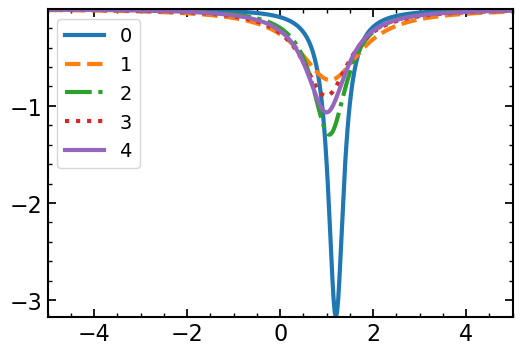

In [27]:
for i, ls in zip(iters, lss):
    l_r, = plt.plot(erange, imag(G2ss_iter[i][2][:, 0]), label='%i'%i, ls=ls)
    # l_i = plt.plot(qrange, imss_iter[i][:, 0], ls=':', c=l_r.get_c())

plt.legend(fontsize=14)

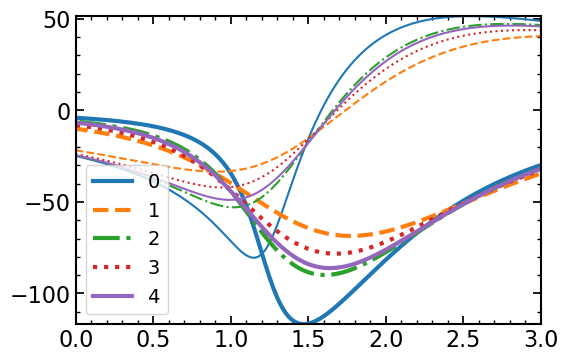

In [28]:
for i, ls in zip(iters, lss):
    li, = plt.plot(erange, imag(TMss_iter[i][0][0][:, 0]), ls=ls, label='%i'%i)
    plt.plot(erange, real(TMss_iter[i][0][0][:, 0]), ls=ls, c=li.get_c(), lw=1.5)


plt.xlim(0, 3)
plt.legend(fontsize=14)

(0.0, 2.0)

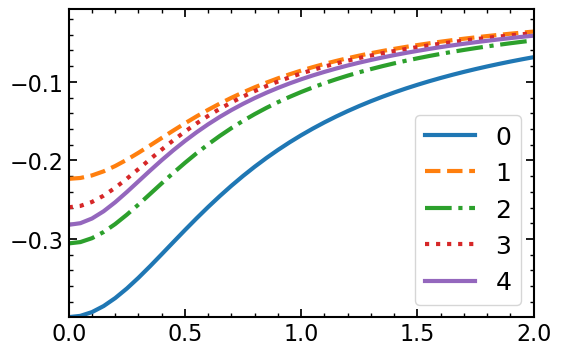

In [29]:
for i, ls in zip(iters, lss):
    l_r, = plt.plot(qrange, imss_iter[i][:, 0], label='%i'%i, ls=ls)
    # l_i = plt.plot(qrange, imss_iter[i][:, 0], ls=':', c=l_r.get_c())

plt.legend()
plt.xlim(0, 2)

(0.0, 2.0)

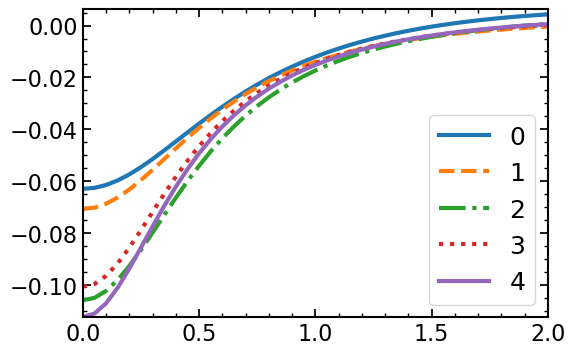

In [30]:
for i, ls in zip(iters, lss):
    l_r, = plt.plot(qrange, ress_iter[i][:, 0], label='%i'%i, ls=ls)
    # l_i = plt.plot(qrange, imss_iter[i][:, 0], ls=':', c=l_r.get_c())

plt.legend()
plt.xlim(0, 2)

### Aux plot with summed T-matrix

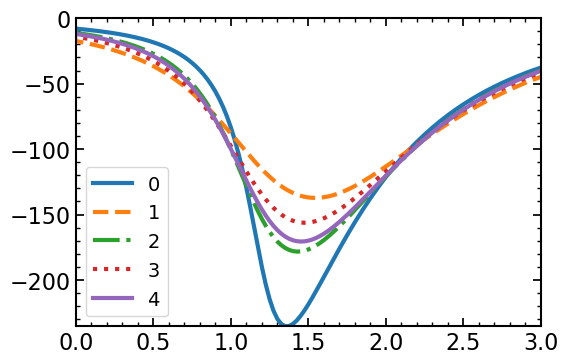

In [75]:
for i, ls in zip(iters, lss):
    li, = plt.plot(erange, imag(TMss_iter[i][0][0][:, 0] + TMss_iter[i][0][1][:, 0]), ls=ls, label='%i'%i)
    # plt.plot(erange, real(TMss_iter[i][0][0][:, 0]), ls=ls, c=li.get_c(), lw=1.5)


plt.xlim(0, 3)
plt.legend(fontsize=14)

## Compare values

In [104]:
imag(G2ss_iter[0][0][:, 0])

array([-0.00330119, -0.00332795, -0.00335503, -0.00338244, -0.0034102 ,
       -0.00343829, -0.00346673, -0.00349553, -0.00352469, -0.00355421,
       -0.00358411, -0.00361438, -0.00364504, -0.0036761 , -0.00370755,
       -0.0037394 , -0.00377167, -0.00380435, -0.00383747, -0.00387102,
       -0.003905  , -0.00393944, -0.00397434, -0.0040097 , -0.00404553,
       -0.00408185, -0.00411866, -0.00415597, -0.00419379, -0.00423212,
       -0.00427099, -0.00431039, -0.00435034, -0.00439084, -0.00443192,
       -0.00447357, -0.00451581, -0.00455866, -0.00460211, -0.00464619,
       -0.00469091, -0.00473627, -0.0047823 , -0.004829  , -0.00487638,
       -0.00492447, -0.00497327, -0.0050228 , -0.00507307, -0.00512411,
       -0.00517591, -0.0052285 , -0.0052819 , -0.00533612, -0.00539118,
       -0.0054471 , -0.00550389, -0.00556157, -0.00562017, -0.00567969,
       -0.00574016, -0.00580161, -0.00586404, -0.00592749, -0.00599197,
       -0.00605751, -0.00612413, -0.00619186, -0.00626071, -0.00

In [105]:
(TMss_iter[0][0][0] + TMss_iter[0][0][1])[:, 0]

array([ 7.16572305e-02  +0.j        , -7.16572305e-02  +0.j        ,
       -2.16056692e-01  +0.j        , -3.61553602e-01  +0.j        ,
       -5.08160602e-01  +0.j        , -6.55890529e-01  +0.j        ,
       -8.04756419e-01  +0.j        , -9.54771513e-01  +0.j        ,
       -1.10594926e+00  +0.j        , -1.25830331e+00  +0.j        ,
       -1.41184755e+00  +0.j        , -1.56659608e+00  +0.j        ,
       -1.72256320e+00  +0.j        , -1.87976348e+00  +0.j        ,
       -2.03821169e+00  +0.j        , -2.19792286e+00  +0.j        ,
       -2.35891225e+00  +0.j        , -2.52119538e+00  +0.j        ,
       -2.68478801e+00  +0.j        , -2.84970616e+00  +0.j        ,
       -3.01596614e+00  +0.j        , -3.18358449e+00  +0.j        ,
       -3.35257805e+00  +0.j        , -3.52296394e+00  +0.j        ,
       -3.69475956e+00  +0.j        , -3.86798260e+00  +0.j        ,
       -4.04265106e+00  +0.j        , -4.21878323e+00  +0.j        ,
       -4.39639773e+00  +0.j      

## Misc

In [ ]:
plt.plot(qrange, omKs[:, 0])
plt.plot(qrange, sqrt(mQ**2 + qrange**2), ls='--')

In [ ]:
plt.plot(qrange, ress[:, 0])
plt.plot(qrange, imss[:, 0])

In [81]:
df.close()

NameError: name 'df' is not defined

In [166]:
__ = channels_QQ.get_T()

In [198]:
channels_QA['qa1'].chs[0].TM

AttributeError: 'Channel' object has no attribute 'TM'

In [171]:
channels_QQ['qq3'].chs[1].XS

[array([[ 0.01086167+7.38442635e-05j,  0.01086167+7.38442635e-05j,
          0.01086167+7.38442635e-05j, ...,  0.01086167+7.38442635e-05j,
          0.01086167+7.38442635e-05j,  0.01086167+7.38442635e-05j],
        [ 0.01093981+7.49591713e-05j,  0.01093981+7.49591713e-05j,
          0.01093981+7.49591713e-05j, ...,  0.01093981+7.49591713e-05j,
          0.01093981+7.49591713e-05j,  0.01093981+7.49591713e-05j],
        [ 0.01101909+7.60996023e-05j,  0.01101909+7.60996023e-05j,
          0.01101909+7.60996023e-05j, ...,  0.01101909+7.60996023e-05j,
          0.01101909+7.60996023e-05j,  0.01101909+7.60996023e-05j],
        ...,
        [-0.02388578+1.05375777e-03j, -0.02388578+1.05375777e-03j,
         -0.02388578+1.05375777e-03j, ..., -0.02388578+1.05375777e-03j,
         -0.02388578+1.05375777e-03j, -0.02388578+1.05375777e-03j],
        [-0.02417729+6.12164352e-02j, -0.02417729+6.12164352e-02j,
         -0.02417729+6.12164352e-02j, ..., -0.02417729+6.12164352e-02j,
         -0.02417729

In [145]:
get_xs(0.5)

([0.7838913525076949, 0.7838913525076949],
 0.0028663849170295352,
 -0.024985880074876093)

In [144]:
OUT

[([0.6025900959492952, 0.6025900959492952],
  0.0025900959492953088,
  -0.03864067667713826),
 ([0.6108928610053742, 0.6108928610053742],
  0.002616607975552297,
  -0.03787862660005953),
 ([0.6351390728942041, 0.6351390728942041],
  0.002683540860528276,
  -0.03577265477068179),
 ([0.6735828669580936, 0.6735828669580936],
  0.002762473708156587,
  -0.032748188023287945),
 ([0.7239348796933783, 0.7239348796933783],
  0.002824624600580432,
  -0.029288842354522292),
 ([0.7838767782282257, 0.7838767782282257],
  0.002851810637560206,
  -0.025779899050599978),
 ([0.8513662144254537, 0.8513662144254537],
  0.002838077001596541,
  -0.02246453320023873),
 ([0.9247406009668706, 0.9247406009668706],
  0.0027861552375818177,
  -0.01946486593947097),
 ([1.0027031348404065, 1.0027031348404065],
  0.0027031348404064764,
  -0.016822020951578424),
 ([1.084262707059762, 1.084262707059762],
  0.0025973244205653523,
  -0.014530762671229608),
 ([1.168666882698235, 1.168666882698235],
  0.00247650372917497

In [143]:
imss.shape

(51,)

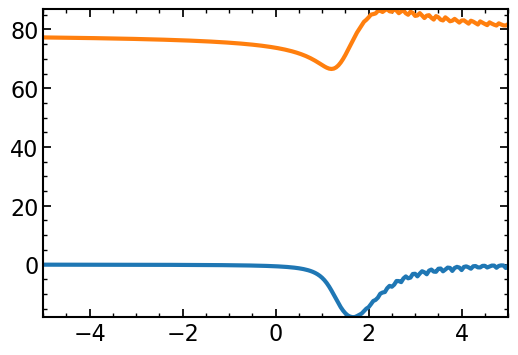

In [27]:
plt.plot(erange, imag(channels_QQ['qq6'].chs[0].TM)[:, 0])
plt.plot(erange, real(channels_QQ['qq6'].chs[0].TM)[:, 0])

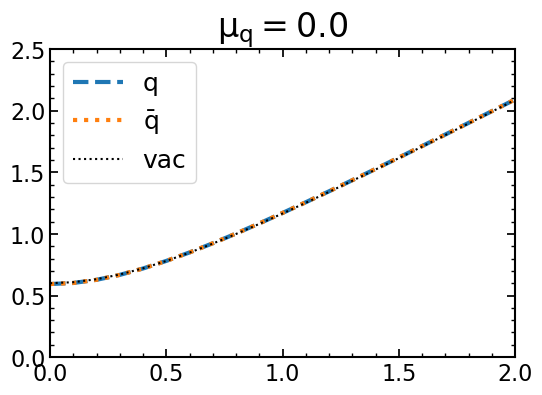

In [28]:
lQ, = plt.plot(qrange, omKs[:, 0], ls='--', label='q')
lA, = plt.plot(qrange, omKs[:, 1], ls=':', label=r'$\bar q$')
plt.plot(qrange, sqrt(mQ**2 + qrange**2), ls=':', lw=1.5, c='black', label='vac')

plt.legend()

plt.xlim(0, 2)
plt.ylim(0, 2.5)
plt.title(fr'$\mu_q = {mu/T}$')

suff = ''
if subtr:
    suff = '_subtr'

# plt.savefig('omk_T=%.2f_mu=%.2f%s.pdf'%(T, mu/T, suff), bbox_inches='tight')

Text(0.5, 0, 'k [GeV]')

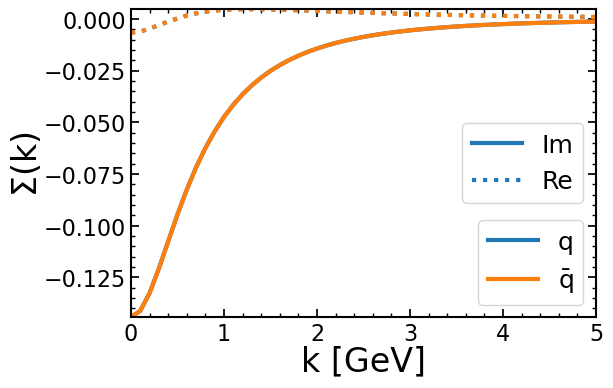

In [29]:
lQ, = plt.plot(qrange, imss[:, 0], ls='-')
lQre, = plt.plot(qrange, ress[:, 0], ls=':', c=lQ.get_c())

lA, = plt.plot(qrange, imss[:, 1], ls='-')
plt.plot(qrange, ress[:, 1], ls=':', c=lA.get_c())

leg = plt.legend([lQ, lQre], ['Im', 'Re'], loc='center right')

leg2 = plt.legend([lQ, lA], ['q', r'$\bar q$'])

plt.gca().add_artist(leg)

# plt.plot(qrange, sqrt(mQ**2 + qrange**2))

# plt.xlim(0, 2)
# plt.ylim(0, 2.5)
plt.ylabel(r'$\Sigma(k)$')
plt.xlabel('k [GeV]')

# plt.savefig('Sk_T=%.2f_mu=%.2f%s.pdf'%(T, mu/T, suff), bbox_inches='tight')


(0.0, 3.0)

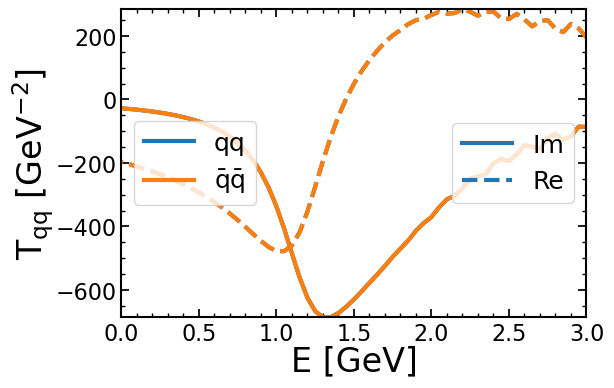

In [30]:
lq, = plt.plot(erange, imag(channels_QQ.get_T())[:, 0], label='qq')
la, = plt.plot(erange, imag(channels_AA.get_T())[:, 0], label='\bar q q')

lqre, = plt.plot(erange, real(channels_QQ.get_T())[:, 0], c=lq.get_c(), ls='--')
plt.plot(erange, real(channels_AA.get_T())[:, 0], c=la.get_c(), ls='--')

plt.ylabel(r'$T_{qq}$ [GeV$^{-2}$]')
plt.xlabel(r'E [GeV]')

leg = plt.legend([lq, lqre], ['Im', 'Re'], loc='center right')

leg2 = plt.legend([lq, la], ['qq', r'$\bar q \bar q$'], loc='center left')
plt.gca().add_artist(leg)

plt.xlim(0, 3)

# plt.savefig('T_qq_T=%.2f_mu=%.2f%s.pdf'%(T, mu/T, suff), bbox_inches='tight')


(0.0, 3.0)

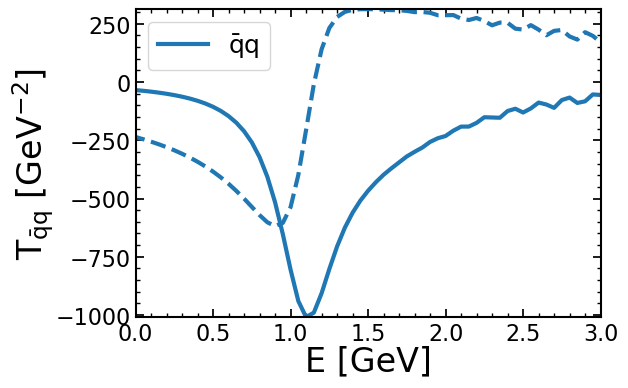

In [32]:
plt.plot(erange, imag(channels_QA.get_T())[:, 0], label=r'$\bar qq$')
# la, = plt.plot(erange, imag(channels_AA.get_T())[:, 0], label='\bar q q')

plt.plot(erange, real(channels_QA.get_T())[:, 0], c=lq.get_c(), ls='--')
# plt.plot(erange, real(channels_AA.get_T())[:, 0], c=la.get_c(), ls='--')

plt.ylabel(r'$T_{\bar qq}$ [GeV$^{-2}$]')
plt.xlabel(r'E [GeV]')

# leg = plt.legend([lq, lqre], ['Im', 'Re'], loc='center right')

# leg2 = plt.legend([lq, la], ['qq', r'$\bar q \bar q$'], loc='center left')
plt.legend()
# plt.gca().add_artist(leg)

plt.xlim(0, 3)
# plt.savefig('T_qa_T=%.2f_mu=%.2f%s.pdf'%(T, mu/T, suff), bbox_inches='tight')


(0.0, 3.0)

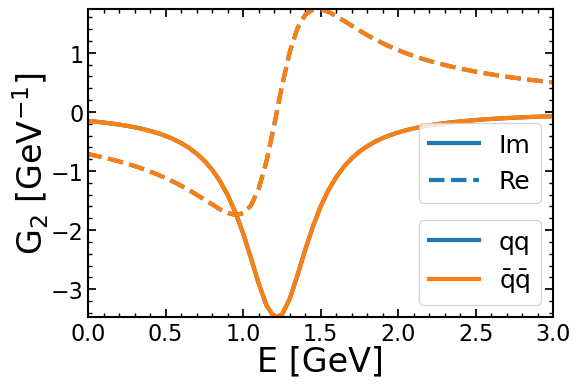

In [33]:
lq, = plt.plot(erange, imag(G2_QQ)[:, 0], label='qq')
la, = plt.plot(erange, imag(G2_AA)[:, 0], label='\bar q q')

lqre, = plt.plot(erange, real(G2_QQ)[:, 0], c=lq.get_c(), ls='--')
plt.plot(erange, real(G2_AA)[:, 0], c=la.get_c(), ls='--')

plt.ylabel(r'$G_{2}$ [GeV$^{-1}$]')
plt.xlabel(r'E [GeV]')

leg = plt.legend([lq, lqre], ['Im', 'Re'], loc='center right')

leg2 = plt.legend([lq, la], ['qq', r'$\bar q \bar q$'], loc='lower right')
plt.gca().add_artist(leg)

plt.xlim(0, 3)

# plt.savefig('G2_qq_T=%.2f_mu=%.2f%s.pdf'%(T, mu/T, suff), bbox_inches='tight')
